,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,IM-0128-0001.jpeg,Normal,TRAIN,unknown,unknown
1,IM-0127-0001.jpeg,Normal,TRAIN,unknown,unknown
2,IM-0125-0001.jpeg,Normal,TRAIN,unknown,unknown
3,IM-0122-0001.jpeg,Normal,TRAIN,unknown,unknown
4,IM-0119-0001.jpeg,Normal,TRAIN,unknown,unknown
...,...,...,...,...,...
5905,person1637_virus_2834.jpeg,Pnemonia,TEST,unknown,Virus
5906,person1635_virus_2831.jpeg,Pnemonia,TEST,unknown,Virus
5907,person1634_virus_2830.jpeg,Pnemonia,TEST,unknown,Virus
5908,person1633_virus_2829.jpeg,Pnemonia,TEST,unknown,Virus


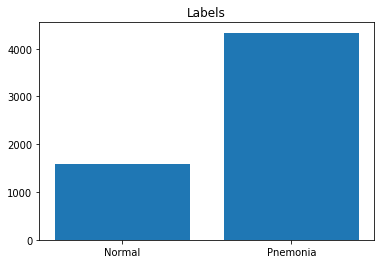

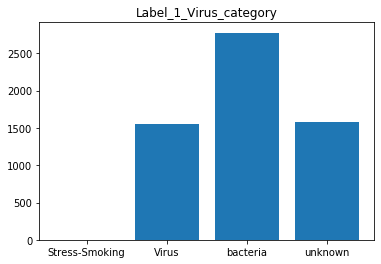

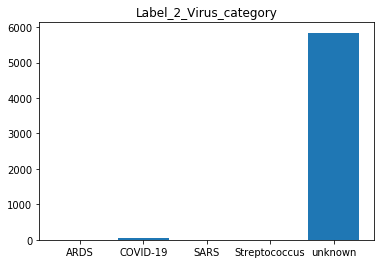

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
summary = pd.read_csv('summary.csv')
metadata = pd.read_csv('metadata.csv')
summary = summary.fillna('unknown')
t = summary.groupby('Label').sum()
plt.figure(0)
plt.title('Labels')
plt.bar(t.index, t['Image_Count'])

t = summary.groupby('Label_1_Virus_category').sum()
plt.figure(1)
plt.title('Label_1_Virus_category')
plt.bar(t.index, t['Image_Count'])

t = summary.groupby('Label_2_Virus_category').sum()
plt.figure(2)
plt.title('Label_2_Virus_category')
plt.bar(t.index, t['Image_Count'])

metadata = metadata.fillna('unknown')
metadata

In [2]:
from os import listdir
from PIL import Image as PImage
from tensorflow.keras.preprocessing import image
import numpy as np
def loadImages(path,data):
    # return array of images
    print('starting set')
    imagesList = listdir(path)
    loadedImages = []
    for imag in range(0,len(data)):
        title = data['X_ray_image_name'][imag]
        img = image.load_img(path + title, target_size=(28,28,1), color_mode="grayscale")
        img = np.expand_dims(img,axis=2)
        img = np.array(img)
        print(title,' : ',img.shape)
        img = img.astype('float32')
        img = img/255
        loadedImages.append(img)
    return loadedImages

path_test = "/Users/dev/Desktop/MLProjects/Covid-19CT-ScanModel/test/"
path_train = "/Users/dev/Desktop/MLProjects/Covid-19CT-ScanModel/train/"

train_data = metadata[metadata['Dataset_type'] == 'TRAIN']
test_data = metadata[metadata['Dataset_type'] == 'TEST']
test_data = test_data.reset_index()
# your images in an array
train_pixels = loadImages(path_train, train_data)
test_pixels = loadImages(path_test, test_data)

starting set
IM-0128-0001.jpeg  :  (28, 28, 1)
IM-0127-0001.jpeg  :  (28, 28, 1)
IM-0125-0001.jpeg  :  (28, 28, 1)
IM-0122-0001.jpeg  :  (28, 28, 1)
IM-0119-0001.jpeg  :  (28, 28, 1)
IM-0117-0001.jpeg  :  (28, 28, 1)
IM-0115-0001.jpeg  :  (28, 28, 1)
IM-0189-0001.jpeg  :  (28, 28, 1)
IM-0187-0001.jpeg  :  (28, 28, 1)
IM-0185-0001.jpeg  :  (28, 28, 1)
IM-0183-0001.jpeg  :  (28, 28, 1)
IM-0182-0001.jpeg  :  (28, 28, 1)
IM-0180-0001.jpeg  :  (28, 28, 1)
IM-0178-0001.jpeg  :  (28, 28, 1)
IM-0177-0001.jpeg  :  (28, 28, 1)
IM-0176-0001.jpeg  :  (28, 28, 1)
IM-0172-0001.jpeg  :  (28, 28, 1)
IM-0170-0001.jpeg  :  (28, 28, 1)
IM-0168-0001.jpeg  :  (28, 28, 1)
IM-0166-0001.jpeg  :  (28, 28, 1)
IM-0164-0001.jpeg  :  (28, 28, 1)
IM-0162-0001.jpeg  :  (28, 28, 1)
IM-0160-0001.jpeg  :  (28, 28, 1)
IM-0158-0001.jpeg  :  (28, 28, 1)
IM-0156-0001.jpeg  :  (28, 28, 1)
IM-0154-0001.jpeg  :  (28, 28, 1)
IM-0152-0001.jpeg  :  (28, 28, 1)
IM-0151-0001.jpeg  :  (28, 28, 1)
IM-0149-0001.jpeg  :  (28, 28, 1)
I

IM-0416-0001.jpeg  :  (28, 28, 1)
IM-0478-0001.jpeg  :  (28, 28, 1)
IM-0477-0001.jpeg  :  (28, 28, 1)
IM-0476-0001.jpeg  :  (28, 28, 1)
IM-0475-0001.jpeg  :  (28, 28, 1)
IM-0474-0001.jpeg  :  (28, 28, 1)
IM-0473-0001.jpeg  :  (28, 28, 1)
IM-0472-0001.jpeg  :  (28, 28, 1)
IM-0471-0001.jpeg  :  (28, 28, 1)
IM-0469-0001.jpeg  :  (28, 28, 1)
IM-0467-0001.jpeg  :  (28, 28, 1)
IM-0467-0001-0002.jpeg  :  (28, 28, 1)
IM-0467-0001-0001.jpeg  :  (28, 28, 1)
IM-0466-0001.jpeg  :  (28, 28, 1)
IM-0465-0001.jpeg  :  (28, 28, 1)
IM-0464-0001.jpeg  :  (28, 28, 1)
IM-0463-0001.jpeg  :  (28, 28, 1)
IM-0461-0001.jpeg  :  (28, 28, 1)
IM-0460-0001.jpeg  :  (28, 28, 1)
IM-0459-0001.jpeg  :  (28, 28, 1)
IM-0458-0001.jpeg  :  (28, 28, 1)
IM-0457-0001.jpeg  :  (28, 28, 1)
IM-0456-0001.jpeg  :  (28, 28, 1)
IM-0455-0001.jpeg  :  (28, 28, 1)
IM-0453-0001.jpeg  :  (28, 28, 1)
IM-0453-0001-0002.jpeg  :  (28, 28, 1)
IM-0452-0001.jpeg  :  (28, 28, 1)
IM-0451-0001.jpeg  :  (28, 28, 1)
IM-0450-0001.jpeg  :  (28, 28, 1)

IM-0664-0001.jpeg  :  (28, 28, 1)
IM-0663-0001.jpeg  :  (28, 28, 1)
IM-0662-0001.jpeg  :  (28, 28, 1)
IM-0661-0001.jpeg  :  (28, 28, 1)
IM-0660-0001.jpeg  :  (28, 28, 1)
IM-0660-0001-0002.jpeg  :  (28, 28, 1)
IM-0660-0001-0001.jpeg  :  (28, 28, 1)
IM-0659-0001.jpeg  :  (28, 28, 1)
IM-0658-0001.jpeg  :  (28, 28, 1)
IM-0657-0001.jpeg  :  (28, 28, 1)
IM-0656-0001.jpeg  :  (28, 28, 1)
IM-0656-0001-0002.jpeg  :  (28, 28, 1)
IM-0656-0001-0001.jpeg  :  (28, 28, 1)
IM-0655-0001.jpeg  :  (28, 28, 1)
IM-0654-0001.jpeg  :  (28, 28, 1)
IM-0652-0001.jpeg  :  (28, 28, 1)
IM-0652-0001-0002.jpeg  :  (28, 28, 1)
IM-0651-0001.jpeg  :  (28, 28, 1)
IM-0650-0001.jpeg  :  (28, 28, 1)
IM-0650-0001-0002.jpeg  :  (28, 28, 1)
IM-0650-0001-0001.jpeg  :  (28, 28, 1)
IM-0649-0001.jpeg  :  (28, 28, 1)
IM-0648-0001.jpeg  :  (28, 28, 1)
IM-0647-0001.jpeg  :  (28, 28, 1)
IM-0646-0001.jpeg  :  (28, 28, 1)
IM-0645-0001.jpeg  :  (28, 28, 1)
IM-0644-0001.jpeg  :  (28, 28, 1)
IM-0644-0001-0002.jpeg  :  (28, 28, 1)
IM-0644-

NORMAL2-IM-0501-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0500-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0499-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0497-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0496-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0493-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0491-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0490-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0572-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0571-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0569-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0568-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0567-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0566-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0564-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0563-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0561-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0559-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0558-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0557-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0555-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0555-0001-0002.jpeg  :  (28, 28, 1)
NORMAL2-IM-0555-0001-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0554-0001.jpe

NORMAL2-IM-0872-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0871-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0870-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0869-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0868-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0867-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0866-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0865-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0863-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0862-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0860-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0859-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0858-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0857-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0856-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0855-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0854-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0853-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0852-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0851-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0851-0001-0002.jpeg  :  (28, 28, 1)
NORMAL2-IM-0851-0001-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0849-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0848-0001.jpe

NORMAL2-IM-1060-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1059-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1058-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1056-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1055-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1054-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1053-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1142-0001-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1141-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1138-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1136-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1135-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1134-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1132-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1131-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1130-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1128-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1128-0001-0002.jpeg  :  (28, 28, 1)
NORMAL2-IM-1128-0001-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1127-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1126-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1125-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1124-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1123-000

NORMAL2-IM-1296-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1295-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1294-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1294-0001-0002.jpeg  :  (28, 28, 1)
NORMAL2-IM-1294-0001-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1293-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1423-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1422-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1419-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1412-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1406-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1401-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1400-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1396-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1385-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1379-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1376-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1371-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1365-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1362-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1360-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1357-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1356-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-1351-0001.jpe

person108_virus_200.jpeg  :  (28, 28, 1)
person108_virus_199.jpeg  :  (28, 28, 1)
person1089_virus_1808.jpeg  :  (28, 28, 1)
person1089_bacteria_3029.jpeg  :  (28, 28, 1)
person1088_virus_1800.jpeg  :  (28, 28, 1)
person1088_bacteria_3028.jpeg  :  (28, 28, 1)
person1087_virus_1799.jpeg  :  (28, 28, 1)
person1087_bacteria_3027.jpeg  :  (28, 28, 1)
person1086_virus_1798.jpeg  :  (28, 28, 1)
person1086_bacteria_3026.jpeg  :  (28, 28, 1)
person1085_virus_1797.jpeg  :  (28, 28, 1)
person1085_bacteria_3025.jpeg  :  (28, 28, 1)
person1084_virus_1796.jpeg  :  (28, 28, 1)
person1084_bacteria_3024.jpeg  :  (28, 28, 1)
person1083_virus_1795.jpeg  :  (28, 28, 1)
person1083_bacteria_3023.jpeg  :  (28, 28, 1)
person1082_virus_1794.jpeg  :  (28, 28, 1)
person1082_bacteria_3022.jpeg  :  (28, 28, 1)
person1081_virus_1793.jpeg  :  (28, 28, 1)
person1081_bacteria_3021.jpeg  :  (28, 28, 1)
person1080_virus_1791.jpeg  :  (28, 28, 1)
person1080_bacteria_3020.jpeg  :  (28, 28, 1)
person107_virus_197.jpeg  : 

person1231_virus_2088.jpeg  :  (28, 28, 1)
person1231_bacteria_3186.jpeg  :  (28, 28, 1)
person1230_virus_2081.jpeg  :  (28, 28, 1)
person1230_bacteria_3185.jpeg  :  (28, 28, 1)
person122_virus_229.jpeg  :  (28, 28, 1)
person1229_virus_2080.jpeg  :  (28, 28, 1)
person1228_virus_2079.jpeg  :  (28, 28, 1)
person1228_bacteria_3183.jpeg  :  (28, 28, 1)
person1227_virus_2078.jpeg  :  (28, 28, 1)
person1227_bacteria_3182.jpeg  :  (28, 28, 1)
person1226_virus_2077.jpeg  :  (28, 28, 1)
person1225_virus_2076.jpeg  :  (28, 28, 1)
person1225_bacteria_3180.jpeg  :  (28, 28, 1)
person1224_virus_2074.jpeg  :  (28, 28, 1)
person1223_virus_2073.jpeg  :  (28, 28, 1)
person1223_bacteria_3178.jpeg  :  (28, 28, 1)
person1222_virus_2071.jpeg  :  (28, 28, 1)
person1222_bacteria_3177.jpeg  :  (28, 28, 1)
person1220_virus_2068.jpeg  :  (28, 28, 1)
person1220_bacteria_3174.jpeg  :  (28, 28, 1)
person1220_bacteria_3173.jpeg  :  (28, 28, 1)
person1219_virus_2067.jpeg  :  (28, 28, 1)
person1219_bacteria_3172.jpeg

person1342_virus_2315.jpeg  :  (28, 28, 1)
person1342_bacteria_3407.jpeg  :  (28, 28, 1)
person1341_virus_2313.jpeg  :  (28, 28, 1)
person1341_bacteria_3406.jpeg  :  (28, 28, 1)
person1340_virus_2312.jpeg  :  (28, 28, 1)
person1340_virus_2311.jpeg  :  (28, 28, 1)
person1340_bacteria_3405.jpeg  :  (28, 28, 1)
person133_virus_267.jpeg  :  (28, 28, 1)
person1339_bacteria_3402.jpeg  :  (28, 28, 1)
person1339_bacteria_3399.jpeg  :  (28, 28, 1)
person1338_virus_2308.jpeg  :  (28, 28, 1)
person1338_bacteria_3397.jpeg  :  (28, 28, 1)
person1338_bacteria_3395.jpeg  :  (28, 28, 1)
person1338_bacteria_3394.jpeg  :  (28, 28, 1)
person1337_virus_2307.jpeg  :  (28, 28, 1)
person1336_virus_2306.jpeg  :  (28, 28, 1)
person1333_virus_2301.jpeg  :  (28, 28, 1)
person1333_bacteria_3386.jpeg  :  (28, 28, 1)
person1333_bacteria_3385.jpeg  :  (28, 28, 1)
person1333_bacteria_3384.jpeg  :  (28, 28, 1)
person1333_bacteria_3383.jpeg  :  (28, 28, 1)
person1332_virus_2300.jpeg  :  (28, 28, 1)
person1331_virus_229

person1433_bacteria_3704.jpeg  :  (28, 28, 1)
person1433_bacteria_3701.jpeg  :  (28, 28, 1)
person1432_bacteria_3699.jpeg  :  (28, 28, 1)
person1431_bacteria_3698.jpeg  :  (28, 28, 1)
person1430_virus_2444.jpeg  :  (28, 28, 1)
person1430_bacteria_3697.jpeg  :  (28, 28, 1)
person1430_bacteria_3696.jpeg  :  (28, 28, 1)
person1430_bacteria_3695.jpeg  :  (28, 28, 1)
person1430_bacteria_3694.jpeg  :  (28, 28, 1)
person1430_bacteria_3693.jpeg  :  (28, 28, 1)
person142_virus_288.jpeg  :  (28, 28, 1)
person1429_virus_2443.jpeg  :  (28, 28, 1)
person1429_bacteria_3691.jpeg  :  (28, 28, 1)
person1429_bacteria_3690.jpeg  :  (28, 28, 1)
person1429_bacteria_3688.jpeg  :  (28, 28, 1)
person1428_virus_2442.jpeg  :  (28, 28, 1)
person1427_virus_2441.jpeg  :  (28, 28, 1)
person1426_virus_2439.jpeg  :  (28, 28, 1)
person1426_bacteria_3668.jpeg  :  (28, 28, 1)
person1426_bacteria_3667.jpeg  :  (28, 28, 1)
person1425_virus_2438.jpeg  :  (28, 28, 1)
person1424_virus_2437.jpeg  :  (28, 28, 1)
person1424_bac

person1506_virus_2616.jpeg  :  (28, 28, 1)
person1506_bacteria_3933.jpeg  :  (28, 28, 1)
person1505_virus_2615.jpeg  :  (28, 28, 1)
person1504_virus_2614.jpeg  :  (28, 28, 1)
person1504_bacteria_3931.jpeg  :  (28, 28, 1)
person1503_virus_2613.jpeg  :  (28, 28, 1)
person1502_virus_2612.jpeg  :  (28, 28, 1)
person1502_bacteria_3929.jpeg  :  (28, 28, 1)
person1502_bacteria_3928.jpeg  :  (28, 28, 1)
person1502_bacteria_3927.jpeg  :  (28, 28, 1)
person1502_bacteria_3925.jpeg  :  (28, 28, 1)
person1502_bacteria_3924.jpeg  :  (28, 28, 1)
person1502_bacteria_3923.jpeg  :  (28, 28, 1)
person1502_bacteria_3922.jpeg  :  (28, 28, 1)
person1501_virus_2611.jpeg  :  (28, 28, 1)
person1500_virus_2610.jpeg  :  (28, 28, 1)
person1500_bacteria_3916.jpeg  :  (28, 28, 1)
person14_bacteria_51.jpeg  :  (28, 28, 1)
person149_virus_299.jpeg  :  (28, 28, 1)
person1499_virus_2609.jpeg  :  (28, 28, 1)
person1499_bacteria_3915.jpeg  :  (28, 28, 1)
person1497_virus_2607.jpeg  :  (28, 28, 1)
person1497_bacteria_3912

person1590_bacteria_4176.jpeg  :  (28, 28, 1)
person1590_bacteria_4175.jpeg  :  (28, 28, 1)
person1590_bacteria_4174.jpeg  :  (28, 28, 1)
person158_virus_312.jpeg  :  (28, 28, 1)
person1589_virus_2763.jpeg  :  (28, 28, 1)
person1589_bacteria_4172.jpeg  :  (28, 28, 1)
person1589_bacteria_4171.jpeg  :  (28, 28, 1)
person1588_virus_2762.jpeg  :  (28, 28, 1)
person1585_bacteria_4155.jpeg  :  (28, 28, 1)
person1585_bacteria_4151.jpeg  :  (28, 28, 1)
person1585_bacteria_4149.jpeg  :  (28, 28, 1)
person1584_bacteria_4148.jpeg  :  (28, 28, 1)
person1584_bacteria_4146.jpeg  :  (28, 28, 1)
person1583_bacteria_4144.jpeg  :  (28, 28, 1)
person1582_bacteria_4143.jpeg  :  (28, 28, 1)
person1582_bacteria_4142.jpeg  :  (28, 28, 1)
person1582_bacteria_4140.jpeg  :  (28, 28, 1)
person1582_bacteria_4137.jpeg  :  (28, 28, 1)
person1582_bacteria_4136.jpeg  :  (28, 28, 1)
person1581_virus_2741.jpeg  :  (28, 28, 1)
person1581_bacteria_4135.jpeg  :  (28, 28, 1)
person1580_virus_2739.jpeg  :  (28, 28, 1)
perso

person1724_bacteria_4549.jpeg  :  (28, 28, 1)
person1723_bacteria_4548.jpeg  :  (28, 28, 1)
person1722_bacteria_4547.jpeg  :  (28, 28, 1)
person1721_bacteria_4546.jpeg  :  (28, 28, 1)
person1720_bacteria_4545.jpeg  :  (28, 28, 1)
person1719_bacteria_4544.jpeg  :  (28, 28, 1)
person1719_bacteria_4542.jpeg  :  (28, 28, 1)
person1719_bacteria_4541.jpeg  :  (28, 28, 1)
person1718_bacteria_4540.jpeg  :  (28, 28, 1)
person1718_bacteria_4538.jpeg  :  (28, 28, 1)
person1717_bacteria_4536.jpeg  :  (28, 28, 1)
person1717_bacteria_4534.jpeg  :  (28, 28, 1)
person1716_bacteria_4533.jpeg  :  (28, 28, 1)
person1715_bacteria_4532.jpeg  :  (28, 28, 1)
person1713_bacteria_4530.jpeg  :  (28, 28, 1)
person1712_bacteria_4529.jpeg  :  (28, 28, 1)
person1711_bacteria_4527.jpeg  :  (28, 28, 1)
person1710_bacteria_4526.jpeg  :  (28, 28, 1)
person1710_bacteria_4525.jpeg  :  (28, 28, 1)
person1709_bacteria_4524.jpeg  :  (28, 28, 1)
person1709_bacteria_4523.jpeg  :  (28, 28, 1)
person1709_bacteria_4522.jpeg  :  

person274_bacteria_1288.jpeg  :  (28, 28, 1)
person273_virus_562.jpeg  :  (28, 28, 1)
person273_virus_561.jpeg  :  (28, 28, 1)
person272_virus_559.jpeg  :  (28, 28, 1)
person271_virus_556.jpeg  :  (28, 28, 1)
person270_virus_555.jpeg  :  (28, 28, 1)
person26_bacteria_133.jpeg  :  (28, 28, 1)
person26_bacteria_132.jpeg  :  (28, 28, 1)
person26_bacteria_131.jpeg  :  (28, 28, 1)
person26_bacteria_130.jpeg  :  (28, 28, 1)
person26_bacteria_129.jpeg  :  (28, 28, 1)
person26_bacteria_128.jpeg  :  (28, 28, 1)
person26_bacteria_127.jpeg  :  (28, 28, 1)
person26_bacteria_126.jpeg  :  (28, 28, 1)
person26_bacteria_124.jpeg  :  (28, 28, 1)
person26_bacteria_123.jpeg  :  (28, 28, 1)
person26_bacteria_122.jpeg  :  (28, 28, 1)
person269_virus_554.jpeg  :  (28, 28, 1)
person268_virus_553.jpeg  :  (28, 28, 1)
person267_virus_552.jpeg  :  (28, 28, 1)
person267_bacteria_1253.jpeg  :  (28, 28, 1)
person267_bacteria_1252.jpeg  :  (28, 28, 1)
person267_bacteria_1251.jpeg  :  (28, 28, 1)
person267_bacteria_

person1918_bacteria_4825.jpeg  :  (28, 28, 1)
person1917_bacteria_4823.jpeg  :  (28, 28, 1)
person1916_bacteria_4821.jpeg  :  (28, 28, 1)
person1912_bacteria_4817.jpeg  :  (28, 28, 1)
person1912_bacteria_4816.jpeg  :  (28, 28, 1)
person1911_bacteria_4815.jpeg  :  (28, 28, 1)
person1910_bacteria_4814.jpeg  :  (28, 28, 1)
person1908_bacteria_4811.jpeg  :  (28, 28, 1)
person1907_bacteria_4806.jpeg  :  (28, 28, 1)
person1906_bacteria_4803.jpeg  :  (28, 28, 1)
person1905_bacteria_4801.jpeg  :  (28, 28, 1)
person1904_bacteria_4798.jpeg  :  (28, 28, 1)
person1903_bacteria_4797.jpeg  :  (28, 28, 1)
person1901_bacteria_4795.jpeg  :  (28, 28, 1)
person18_bacteria_57.jpeg  :  (28, 28, 1)
person1897_bacteria_4789.jpeg  :  (28, 28, 1)
person1896_bacteria_4788.jpeg  :  (28, 28, 1)
person1893_bacteria_4781.jpeg  :  (28, 28, 1)
person1888_bacteria_4775.jpeg  :  (28, 28, 1)
person1886_bacteria_4773.jpeg  :  (28, 28, 1)
person1885_bacteria_4772.jpeg  :  (28, 28, 1)
person1884_bacteria_4771.jpeg  :  (28,

person299_virus_620.jpeg  :  (28, 28, 1)
person299_bacteria_1419.jpeg  :  (28, 28, 1)
person299_bacteria_1418.jpeg  :  (28, 28, 1)
person299_bacteria_1417.jpeg  :  (28, 28, 1)
person299_bacteria_1416.jpeg  :  (28, 28, 1)
person299_bacteria_1414.jpeg  :  (28, 28, 1)
person298_virus_618.jpeg  :  (28, 28, 1)
person298_virus_617.jpeg  :  (28, 28, 1)
person298_bacteria_1413.jpeg  :  (28, 28, 1)
person298_bacteria_1412.jpeg  :  (28, 28, 1)
person298_bacteria_1411.jpeg  :  (28, 28, 1)
person298_bacteria_1410.jpeg  :  (28, 28, 1)
person298_bacteria_1409.jpeg  :  (28, 28, 1)
person298_bacteria_1408.jpeg  :  (28, 28, 1)
person297_virus_614.jpeg  :  (28, 28, 1)
person297_bacteria_1404.jpeg  :  (28, 28, 1)
person297_bacteria_1400.jpeg  :  (28, 28, 1)
person296_virus_613.jpeg  :  (28, 28, 1)
person296_bacteria_1397.jpeg  :  (28, 28, 1)
person296_bacteria_1396.jpeg  :  (28, 28, 1)
person296_bacteria_1395.jpeg  :  (28, 28, 1)
person296_bacteria_1394.jpeg  :  (28, 28, 1)
person296_bacteria_1393.jpeg  

person371_bacteria_1700.jpeg  :  (28, 28, 1)
person371_bacteria_1699.jpeg  :  (28, 28, 1)
person371_bacteria_1698.jpeg  :  (28, 28, 1)
person371_bacteria_1696.jpeg  :  (28, 28, 1)
person371_bacteria_1695.jpeg  :  (28, 28, 1)
person371_bacteria_1694.jpeg  :  (28, 28, 1)
person370_virus_753.jpeg  :  (28, 28, 1)
person370_virus_752.jpeg  :  (28, 28, 1)
person370_bacteria_1692.jpeg  :  (28, 28, 1)
person370_bacteria_1691.jpeg  :  (28, 28, 1)
person370_bacteria_1690.jpeg  :  (28, 28, 1)
person370_bacteria_1689.jpeg  :  (28, 28, 1)
person370_bacteria_1688.jpeg  :  (28, 28, 1)
person370_bacteria_1687.jpeg  :  (28, 28, 1)
person36_bacteria_185.jpeg  :  (28, 28, 1)
person36_bacteria_184.jpeg  :  (28, 28, 1)
person36_bacteria_183.jpeg  :  (28, 28, 1)
person36_bacteria_182.jpeg  :  (28, 28, 1)
person369_virus_750.jpeg  :  (28, 28, 1)
person369_bacteria_1680.jpeg  :  (28, 28, 1)
person368_virus_748.jpeg  :  (28, 28, 1)
person368_bacteria_1678.jpeg  :  (28, 28, 1)
person368_bacteria_1672.jpeg  :  (

person454_bacteria_1945.jpeg  :  (28, 28, 1)
person453_virus_936.jpeg  :  (28, 28, 1)
person453_virus_935.jpeg  :  (28, 28, 1)
person452_bacteria_1943.jpeg  :  (28, 28, 1)
person451_virus_932.jpeg  :  (28, 28, 1)
person451_bacteria_1942.jpeg  :  (28, 28, 1)
person450_virus_931.jpeg  :  (28, 28, 1)
person450_bacteria_1941.jpeg  :  (28, 28, 1)
person44_bacteria_219.jpeg  :  (28, 28, 1)
person44_bacteria_218.jpeg  :  (28, 28, 1)
person449_bacteria_1940.jpeg  :  (28, 28, 1)
person449_bacteria_1939.jpeg  :  (28, 28, 1)
person449_bacteria_1938.jpeg  :  (28, 28, 1)
person448_virus_922.jpeg  :  (28, 28, 1)
person448_bacteria_1937.jpeg  :  (28, 28, 1)
person448_bacteria_1936.jpeg  :  (28, 28, 1)
person448_bacteria_1935.jpeg  :  (28, 28, 1)
person448_bacteria_1934.jpeg  :  (28, 28, 1)
person448_bacteria_1933.jpeg  :  (28, 28, 1)
person447_virus_921_1.jpeg  :  (28, 28, 1)
person447_virus_921.jpeg  :  (28, 28, 1)
person447_bacteria_1932.jpeg  :  (28, 28, 1)
person446_virus_920.jpeg  :  (28, 28, 1)

person3_bacteria_11.jpeg  :  (28, 28, 1)
person3_bacteria_10.jpeg  :  (28, 28, 1)
person39_bacteria_200.jpeg  :  (28, 28, 1)
person39_bacteria_198.jpeg  :  (28, 28, 1)
person399_virus_793.jpeg  :  (28, 28, 1)
person399_bacteria_1806.jpeg  :  (28, 28, 1)
person399_bacteria_1805.jpeg  :  (28, 28, 1)
person399_bacteria_1804.jpeg  :  (28, 28, 1)
person398_bacteria_1801.jpeg  :  (28, 28, 1)
person398_bacteria_1799.jpeg  :  (28, 28, 1)
person397_virus_790.jpeg  :  (28, 28, 1)
person397_bacteria_1797.jpeg  :  (28, 28, 1)
person396_virus_789.jpeg  :  (28, 28, 1)
person396_bacteria_1796.jpeg  :  (28, 28, 1)
person395_virus_788.jpeg  :  (28, 28, 1)
person395_bacteria_1795.jpeg  :  (28, 28, 1)
person395_bacteria_1794.jpeg  :  (28, 28, 1)
person394_virus_786.jpeg  :  (28, 28, 1)
person394_bacteria_1792.jpeg  :  (28, 28, 1)
person525_bacteria_2220.jpeg  :  (28, 28, 1)
person525_bacteria_2218.jpeg  :  (28, 28, 1)
person525_bacteria_2217.jpeg  :  (28, 28, 1)
person525_bacteria_2216.jpeg  :  (28, 28, 

person481_bacteria_2042.jpeg  :  (28, 28, 1)
person481_bacteria_2041.jpeg  :  (28, 28, 1)
person480_virus_982.jpeg  :  (28, 28, 1)
person480_virus_981.jpeg  :  (28, 28, 1)
person480_bacteria_2040.jpeg  :  (28, 28, 1)
person480_bacteria_2039.jpeg  :  (28, 28, 1)
person480_bacteria_2038.jpeg  :  (28, 28, 1)
person47_bacteria_229.jpeg  :  (28, 28, 1)
person479_virus_978.jpeg  :  (28, 28, 1)
person478_virus_975.jpeg  :  (28, 28, 1)
person478_bacteria_2035.jpeg  :  (28, 28, 1)
person478_bacteria_2032.jpeg  :  (28, 28, 1)
person477_bacteria_2031.jpeg  :  (28, 28, 1)
person477_bacteria_2030.jpeg  :  (28, 28, 1)
person477_bacteria_2029.jpeg  :  (28, 28, 1)
person477_bacteria_2028.jpeg  :  (28, 28, 1)
person476_virus_973.jpeg  :  (28, 28, 1)
person476_bacteria_2026.jpeg  :  (28, 28, 1)
person475_virus_972.jpeg  :  (28, 28, 1)
person475_bacteria_2025.jpeg  :  (28, 28, 1)
person475_bacteria_2024.jpeg  :  (28, 28, 1)
person475_bacteria_2023.jpeg  :  (28, 28, 1)
person475_bacteria_2022.jpeg  :  (28

person56_bacteria_269.jpeg  :  (28, 28, 1)
person56_bacteria_268.jpeg  :  (28, 28, 1)
person56_bacteria_267.jpeg  :  (28, 28, 1)
person569_virus_1110.jpeg  :  (28, 28, 1)
person569_bacteria_2364.jpeg  :  (28, 28, 1)
person569_bacteria_2363.jpeg  :  (28, 28, 1)
person569_bacteria_2362.jpeg  :  (28, 28, 1)
person569_bacteria_2360.jpeg  :  (28, 28, 1)
person568_bacteria_2359.jpeg  :  (28, 28, 1)
person568_bacteria_2358.jpeg  :  (28, 28, 1)
person567_virus_1107.jpeg  :  (28, 28, 1)
person567_bacteria_2354.jpeg  :  (28, 28, 1)
person567_bacteria_2353.jpeg  :  (28, 28, 1)
person567_bacteria_2352.jpeg  :  (28, 28, 1)
person566_virus_1106.jpeg  :  (28, 28, 1)
person566_bacteria_2351.jpeg  :  (28, 28, 1)
person565_virus_1105.jpeg  :  (28, 28, 1)
person565_bacteria_2348.jpeg  :  (28, 28, 1)
person564_virus_1104.jpeg  :  (28, 28, 1)
person564_bacteria_2347.jpeg  :  (28, 28, 1)
person564_bacteria_2346.jpeg  :  (28, 28, 1)
person564_bacteria_2345.jpeg  :  (28, 28, 1)
person564_bacteria_2344.jpeg  :

person718_bacteria_2620.jpeg  :  (28, 28, 1)
person717_bacteria_2618.jpeg  :  (28, 28, 1)
person716_virus_1314.jpeg  :  (28, 28, 1)
person716_bacteria_2617.jpeg  :  (28, 28, 1)
person714_bacteria_2615.jpeg  :  (28, 28, 1)
person713_bacteria_2614.jpeg  :  (28, 28, 1)
person712_virus_1310.jpeg  :  (28, 28, 1)
person712_bacteria_2613.jpeg  :  (28, 28, 1)
person711_virus_1309.jpeg  :  (28, 28, 1)
person711_bacteria_2612.jpeg  :  (28, 28, 1)
person710_virus_1308.jpeg  :  (28, 28, 1)
person710_bacteria_2611.jpeg  :  (28, 28, 1)
person70_bacteria_346.jpeg  :  (28, 28, 1)
person70_bacteria_345.jpeg  :  (28, 28, 1)
person70_bacteria_344.jpeg  :  (28, 28, 1)
person70_bacteria_343.jpeg  :  (28, 28, 1)
person70_bacteria_342.jpeg  :  (28, 28, 1)
person70_bacteria_341.jpeg  :  (28, 28, 1)
person709_bacteria_2608.jpeg  :  (28, 28, 1)
person707_virus_1305.jpeg  :  (28, 28, 1)
person707_bacteria_2606.jpeg  :  (28, 28, 1)
person706_virus_1304.jpeg  :  (28, 28, 1)
person705_virus_1303.jpeg  :  (28, 28, 1

person61_bacteria_291.jpeg  :  (28, 28, 1)
person61_bacteria_290.jpeg  :  (28, 28, 1)
person61_bacteria_289.jpeg  :  (28, 28, 1)
person61_bacteria_288.jpeg  :  (28, 28, 1)
person619_virus_1190.jpeg  :  (28, 28, 1)
person619_bacteria_2491.jpeg  :  (28, 28, 1)
person619_bacteria_2490.jpeg  :  (28, 28, 1)
person618_virus_1189.jpeg  :  (28, 28, 1)
person618_bacteria_2489.jpeg  :  (28, 28, 1)
person617_virus_1187.jpeg  :  (28, 28, 1)
person617_bacteria_2488.jpeg  :  (28, 28, 1)
person616_virus_1186.jpeg  :  (28, 28, 1)
person616_bacteria_2487.jpeg  :  (28, 28, 1)
person615_virus_1184.jpeg  :  (28, 28, 1)
person614_virus_1183.jpeg  :  (28, 28, 1)
person614_bacteria_2483.jpeg  :  (28, 28, 1)
person614_bacteria_2481.jpeg  :  (28, 28, 1)
person614_bacteria_2480.jpeg  :  (28, 28, 1)
person613_virus_1181.jpeg  :  (28, 28, 1)
person613_bacteria_2479.jpeg  :  (28, 28, 1)
person612_virus_1179.jpeg  :  (28, 28, 1)
person612_bacteria_2478.jpeg  :  (28, 28, 1)
person612_bacteria_2477.jpeg  :  (28, 28, 

person7_bacteria_28.jpeg  :  (28, 28, 1)
person7_bacteria_25.jpeg  :  (28, 28, 1)
person7_bacteria_24.jpeg  :  (28, 28, 1)
person799_virus_1431.jpeg  :  (28, 28, 1)
person799_bacteria_2705.jpeg  :  (28, 28, 1)
person798_virus_1430.jpeg  :  (28, 28, 1)
person797_virus_1429.jpeg  :  (28, 28, 1)
person796_virus_1428.jpeg  :  (28, 28, 1)
person796_bacteria_2702.jpeg  :  (28, 28, 1)
person795_virus_1427.jpeg  :  (28, 28, 1)
person794_bacteria_2700.jpeg  :  (28, 28, 1)
person793_virus_1424.jpeg  :  (28, 28, 1)
person791_virus_1422.jpeg  :  (28, 28, 1)
person790_virus_1421.jpeg  :  (28, 28, 1)
person789_virus_1420.jpeg  :  (28, 28, 1)
person789_bacteria_2694.jpeg  :  (28, 28, 1)
person788_virus_1419.jpeg  :  (28, 28, 1)
person787_bacteria_2691.jpeg  :  (28, 28, 1)
person786_bacteria_2690.jpeg  :  (28, 28, 1)
person785_bacteria_2689.jpeg  :  (28, 28, 1)
person783_virus_1414.jpeg  :  (28, 28, 1)
person783_bacteria_2687.jpeg  :  (28, 28, 1)
person782_bacteria_2686.jpeg  :  (28, 28, 1)
person781_

person959_bacteria_2884.jpeg  :  (28, 28, 1)
person958_virus_1630.jpeg  :  (28, 28, 1)
person958_bacteria_2883.jpeg  :  (28, 28, 1)
person957_virus_1629.jpeg  :  (28, 28, 1)
person957_bacteria_2882.jpeg  :  (28, 28, 1)
person956_virus_1628.jpeg  :  (28, 28, 1)
person956_bacteria_2881.jpeg  :  (28, 28, 1)
person955_virus_1627.jpeg  :  (28, 28, 1)
person955_bacteria_2880.jpeg  :  (28, 28, 1)
person954_virus_1626.jpeg  :  (28, 28, 1)
person954_bacteria_2879.jpeg  :  (28, 28, 1)
person953_bacteria_2878.jpeg  :  (28, 28, 1)
person952_virus_1623.jpeg  :  (28, 28, 1)
person952_bacteria_2877.jpeg  :  (28, 28, 1)
person951_virus_1622.jpeg  :  (28, 28, 1)
person951_bacteria_2876.jpeg  :  (28, 28, 1)
person950_virus_1621.jpeg  :  (28, 28, 1)
person94_virus_176.jpeg  :  (28, 28, 1)
person949_virus_1620.jpeg  :  (28, 28, 1)
person949_bacteria_2874.jpeg  :  (28, 28, 1)
person947_virus_1618.jpeg  :  (28, 28, 1)
person947_bacteria_2872.jpeg  :  (28, 28, 1)
person946_bacteria_2871.jpeg  :  (28, 28, 1)


2C10A413-AABE-4807-8CCE-6A2025594067.jpeg  :  (28, 28, 1)
23E99E2E-447C-46E5-8EB2-D35D12473C39.png  :  (28, 28, 1)
1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg  :  (28, 28, 1)
171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg  :  (28, 28, 1)
1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg  :  (28, 28, 1)
1-s2.0-S1684118220300682-main.pdf-003-b2.png  :  (28, 28, 1)
1-s2.0-S1684118220300682-main.pdf-003-b1.png  :  (28, 28, 1)
1-s2.0-S1684118220300682-main.pdf-002-a2.png  :  (28, 28, 1)
1-s2.0-S1684118220300682-main.pdf-002-a1.png  :  (28, 28, 1)
1-s2.0-S1684118220300608-main.pdf-002.jpg  :  (28, 28, 1)
1-s2.0-S1684118220300608-main.pdf-001.jpg  :  (28, 28, 1)
1-s2.0-S0929664620300449-gr2_lrg-d.jpg  :  (28, 28, 1)
1-s2.0-S0929664620300449-gr2_lrg-c.jpg  :  (28, 28, 1)
1-s2.0-S0929664620300449-gr2_lrg-b.jpg  :  (28, 28, 1)
1-s2.0-S0929664620300449-gr2_lrg-a.jpg  :  (28, 28, 1)
1-s2.0-S0140673620303706-fx1_lrg.jpg  :  (28, 28, 1)
01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  :  (28, 28, 1)
starting set
IM-0021

NORMAL2-IM-0098-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0096-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0095-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0092-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0086-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0081-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0079-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0381-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0380-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0378-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0376-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0374-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0374-0001-0002.jpeg  :  (28, 28, 1)
NORMAL2-IM-0374-0001-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0373-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0372-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0370-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0369-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0368-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0366-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0364-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0362-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0361-0001.jpeg  :  (28, 28, 1)
NORMAL2-IM-0360-0001.jpe

person108_bacteria_507.jpeg  :  (28, 28, 1)
person108_bacteria_506.jpeg  :  (28, 28, 1)
person108_bacteria_504.jpeg  :  (28, 28, 1)
person104_bacteria_492.jpeg  :  (28, 28, 1)
person104_bacteria_491.jpeg  :  (28, 28, 1)
person103_bacteria_490.jpeg  :  (28, 28, 1)
person103_bacteria_489.jpeg  :  (28, 28, 1)
person103_bacteria_488.jpeg  :  (28, 28, 1)
person102_bacteria_487.jpeg  :  (28, 28, 1)
person101_bacteria_486.jpeg  :  (28, 28, 1)
person101_bacteria_485.jpeg  :  (28, 28, 1)
person101_bacteria_484.jpeg  :  (28, 28, 1)
person101_bacteria_483.jpeg  :  (28, 28, 1)
person100_bacteria_482.jpeg  :  (28, 28, 1)
person100_bacteria_481.jpeg  :  (28, 28, 1)
person100_bacteria_480.jpeg  :  (28, 28, 1)
person100_bacteria_479.jpeg  :  (28, 28, 1)
person100_bacteria_478.jpeg  :  (28, 28, 1)
person100_bacteria_477.jpeg  :  (28, 28, 1)
person100_bacteria_475.jpeg  :  (28, 28, 1)
person99_bacteria_474.jpeg  :  (28, 28, 1)
person99_bacteria_473.jpeg  :  (28, 28, 1)
person97_bacteria_468.jpeg  :  (28

person1650_virus_2854.jpeg  :  (28, 28, 1)
person1650_virus_2852.jpeg  :  (28, 28, 1)
person1649_virus_2850.jpeg  :  (28, 28, 1)
person1647_virus_2848.jpeg  :  (28, 28, 1)
person1645_virus_2845.jpeg  :  (28, 28, 1)
person1644_virus_2844.jpeg  :  (28, 28, 1)
person1643_virus_2843.jpeg  :  (28, 28, 1)
person1642_virus_2842.jpeg  :  (28, 28, 1)
person1641_virus_2840.jpeg  :  (28, 28, 1)
person1640_virus_2839.jpeg  :  (28, 28, 1)
person1637_virus_2834.jpeg  :  (28, 28, 1)
person1635_virus_2831.jpeg  :  (28, 28, 1)
person1634_virus_2830.jpeg  :  (28, 28, 1)
person1633_virus_2829.jpeg  :  (28, 28, 1)
person1632_virus_2827.jpeg  :  (28, 28, 1)


In [7]:
test_data['Label'] = test_data['Label'].map({'Normal': 0, 'Pnemonia': 1})
test_data['Label_2_Virus_category'] = test_data['Label_2_Virus_category'].map({'ARDS':0,'COVID-19':1,'SARS':2, 'Streptococcus':3, 'unknown':4})
test_data['Label_1_Virus_category'] = test_data['Label_1_Virus_category'].map({'Stress-Smoking':0,'Virus':1,'bacteria':2, 'unknown':3})

train_data['Label'] = train_data['Label'].map({'Normal': 0, 'Pnemonia': 1})
train_data['Label_2_Virus_category'] = train_data['Label_2_Virus_category'].map({'ARDS':0,'COVID-19':1,'SARS':2, 'Streptococcus':3, 'unknown':4})
train_data['Label_1_Virus_category'] = train_data['Label_1_Virus_category'].map({'Stress-Smoking':0,'Virus':1,'bacteria':2, 'unknown':3})
print(train_pixels)

/Users/dev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

KeyboardInterrupt: 

In [5]:
import tensorflow
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

x_train = np.asarray(train_pixels)
x_test = np.asarray(test_pixels)
y_train = train_data[['Label_2_Virus_category']]
y_test = test_data[['Label_2_Virus_category']]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train.shape

(5286, 28, 28, 1)

In [96]:
from tensorflow.keras.regularizers import l2
def create_model(num):
    model = Sequential()
    model.add(Conv2D(32, input_shape = (28,28,1), kernel_size = (3,3), activation = 'relu'))
    model.add(Conv2D(64, activation = 'relu', kernel_size = (3,3)))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.70))
    model.add(Conv2D(128, activation = 'relu', kernel_size = (3,3)))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.75))
    model.add(Conv2D(64, activation = 'relu', kernel_size = (3,3), padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3), padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.75))
    model.add(Flatten())
    model.add(Dense(num, activation = 'softmax', kernel_regularizer=l2(0.001)))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])
    return model

In [90]:
est2 = create_model(5)
ans2 = est2.fit(x_train, y_train, batch_size = 32, epochs = 5, verbose = 2, validation_data = (x_test, y_test))

Epoch 1/5
166/166 - 9s - loss: 0.1896 - accuracy: 0.9743 - val_loss: 0.2155 - val_accuracy: 1.0000
Epoch 2/5
166/166 - 10s - loss: 0.1056 - accuracy: 0.9869 - val_loss: 0.0319 - val_accuracy: 1.0000
Epoch 3/5
166/166 - 10s - loss: 0.0921 - accuracy: 0.9869 - val_loss: 0.0285 - val_accuracy: 1.0000
Epoch 4/5
166/166 - 9s - loss: 0.0786 - accuracy: 0.9869 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 5/5
166/166 - 10s - loss: 0.0735 - accuracy: 0.9869 - val_loss: 0.0094 - val_accuracy: 1.0000


In [97]:
y_train = train_data[['Label_1_Virus_category']]
y_test = test_data[['Label_1_Virus_category']]
y_train = to_categorical(y_train, num_classes =4)
y_test = to_categorical(y_test, num_classes = 4)
est1 = create_model(4)
ans1 = est1.fit(x_train, y_train, batch_size = 32, epochs = 25, verbose = 2, validation_data = (x_test, y_test))

Epoch 1/25
166/166 - 10s - loss: 1.2134 - accuracy: 0.4219 - val_loss: 1.2503 - val_accuracy: 0.3878
Epoch 2/25
166/166 - 10s - loss: 1.1379 - accuracy: 0.4449 - val_loss: 1.2311 - val_accuracy: 0.3878
Epoch 3/25
166/166 - 9s - loss: 1.1080 - accuracy: 0.4578 - val_loss: 1.2030 - val_accuracy: 0.3878
Epoch 4/25
166/166 - 9s - loss: 1.0967 - accuracy: 0.4678 - val_loss: 1.1770 - val_accuracy: 0.3878
Epoch 5/25
166/166 - 11s - loss: 1.0902 - accuracy: 0.4726 - val_loss: 1.1671 - val_accuracy: 0.3878
Epoch 6/25
166/166 - 10s - loss: 1.0837 - accuracy: 0.4739 - val_loss: 1.1580 - val_accuracy: 0.3878
Epoch 7/25
166/166 - 12s - loss: 1.0789 - accuracy: 0.4784 - val_loss: 1.1524 - val_accuracy: 0.3878
Epoch 8/25
166/166 - 13s - loss: 1.0778 - accuracy: 0.4781 - val_loss: 1.1462 - val_accuracy: 0.3878
Epoch 9/25
166/166 - 11s - loss: 1.0804 - accuracy: 0.4779 - val_loss: 1.1427 - val_accuracy: 0.3878
Epoch 10/25
166/166 - 13s - loss: 1.0764 - accuracy: 0.4775 - val_loss: 1.1447 - val_accuracy

In [95]:
y_train = train_data[['Label']]
y_test = test_data[['Label']]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
est = create_model(2)
ans = est.fit(x_train, y_train, batch_size = 32, epochs = 25, verbose = 2, validation_data = (x_test, y_test))

Epoch 1/25
166/166 - 10s - loss: 0.5830 - accuracy: 0.7423 - val_loss: 0.6265 - val_accuracy: 0.6250
Epoch 2/25
166/166 - 10s - loss: 0.4893 - accuracy: 0.7493 - val_loss: 0.9293 - val_accuracy: 0.6250
Epoch 3/25
166/166 - 9s - loss: 0.3829 - accuracy: 0.8055 - val_loss: 0.6195 - val_accuracy: 0.7131
Epoch 4/25
166/166 - 9s - loss: 0.3284 - accuracy: 0.8487 - val_loss: 0.4328 - val_accuracy: 0.8285
Epoch 5/25
166/166 - 9s - loss: 0.2729 - accuracy: 0.8920 - val_loss: 0.4420 - val_accuracy: 0.7548
Epoch 6/25
166/166 - 9s - loss: 0.2488 - accuracy: 0.8986 - val_loss: 0.3601 - val_accuracy: 0.8750
Epoch 7/25
166/166 - 11s - loss: 0.2188 - accuracy: 0.9187 - val_loss: 1.3356 - val_accuracy: 0.6747
Epoch 8/25
166/166 - 13s - loss: 0.2093 - accuracy: 0.9241 - val_loss: 0.4931 - val_accuracy: 0.8077
Epoch 9/25
166/166 - 10s - loss: 0.1971 - accuracy: 0.9289 - val_loss: 0.4677 - val_accuracy: 0.8253
Epoch 10/25
166/166 - 10s - loss: 0.1887 - accuracy: 0.9289 - val_loss: 0.3256 - val_accuracy: 